# 5.9 专题：主成分分析

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 5.9.1 主成分分析简介

In [2]:
rng = np.random.RandomState(1)

In [3]:
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

In [4]:
x.shape

(200, 2)

(-2.732944555052599,
 2.573947788760664,
 -0.9382741425603001,
 1.0100698152716077)

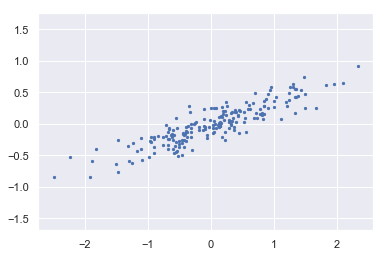

In [5]:
plt.scatter(x[:, 0], x[:, 1], s=5)
plt.axis('equal')

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [10]:
pca.explained_variance_

array([0.7625315, 0.0184779])

为了查看这些数字的含义，在数据图上将这些指标以向量形式画出来，用“成分”定义向量的方向，将“可解释差异”作为向量的平方长度。

In [15]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    

In [12]:
pca.mean_

array([ 0.03351168, -0.00408072])

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

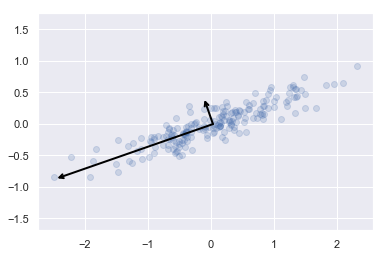

In [16]:
# 画出数据
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

1. 用PCA降维

In [17]:
pca = PCA(n_components=1)

In [18]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
x_pca = pca.transform(x)

In [20]:
x.shape

(200, 2)

In [21]:
x_pca.shape

(200, 1)

为了理解降维的效果，我们来进行数据降维的逆变换，并且与原始数据一起画出。

In [22]:
x_new = pca.inverse_transform(x_pca)

(-2.771528780690219, 2.661757596590678, -0.9964674432667128, 1.021908177590081)

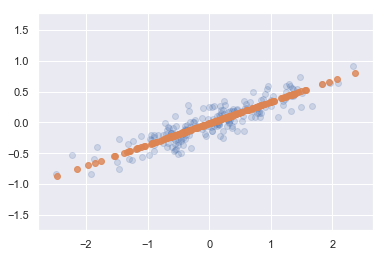

In [23]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal')

2. 用PCA作数据可视化：手写数字

In [27]:
from sklearn.datasets import load_digits

In [28]:
digits = load_digits()

In [29]:
digits.data.shape

(1797, 64)

In [30]:
pca = PCA(2)

In [31]:
projected = pca.fit_transform(digits.data)

In [32]:
digits.data.shape

(1797, 64)

In [33]:
projected.shape

(1797, 2)

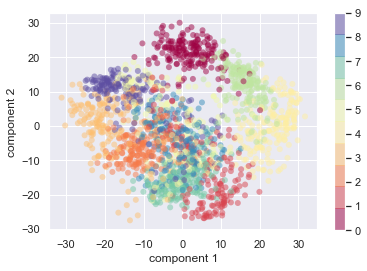

In [35]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

3. 成分的含义

PCA提供数据的低维表示的原理：它发现一组比原始的像素基向量更能有效表示输入数据的基函数。

4. 选择成分的数量

In [36]:
pca = PCA().fit(digits.data)

Text(0,0.5,'cumulative explained variance')

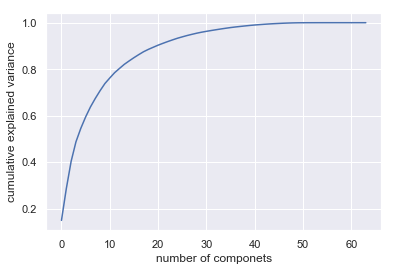

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of componets')
plt.ylabel('cumulative explained variance')

## 5.9.2 用PCA作噪音过滤

任何成分的方差都应该大于噪音的方差

画出几个无噪音的输入数据

In [39]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

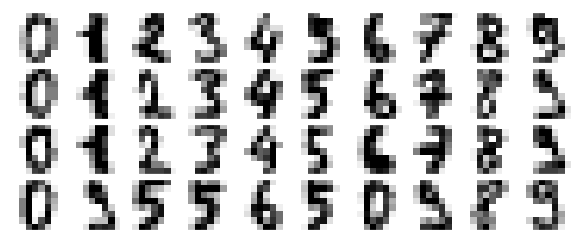

In [40]:
plot_digits(digits.data)

现在添加一些随机噪音并创建一个噪音数据集，重新画图

In [41]:
np.random.seed(42)

In [42]:
noisy = np.random.normal(digits.data, 4)

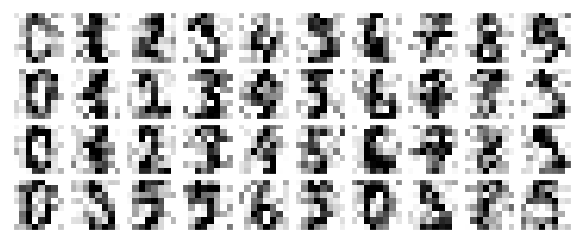

In [43]:
plot_digits(noisy)

In [44]:
pca = PCA(0.5).fit(noisy)

In [45]:
pca.n_components_

12

In [46]:
components = pca.transform(noisy)

In [47]:
filtered = pca.inverse_transform(components)

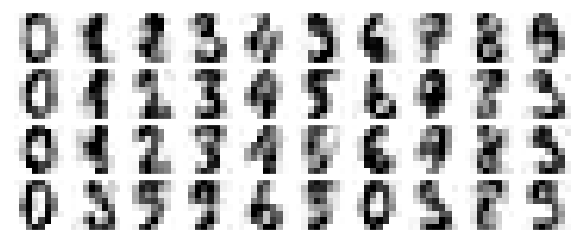

In [48]:
plot_digits(filtered)

In [49]:
pca.inverse_transform??

Signature: pca.inverse_transform(X)
Source:   
    def inverse_transform(self, X):
        """Transform data back to its original space.

        In other words, return an input X_original whose transform would be X.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_components)
            New data, where n_samples is the number of samples
            and n_components is the number of components.

        Returns
        -------
        X_original array-like, shape (n_samples, n_features)

        Notes
        -----
        If whitening is enabled, inverse_transform will compute the
        exact inverse operation, which includes reversing whitening.
        """
        if self.whiten:
            return np.dot(X, np.sqrt(self.explained_variance_[:, np.newaxis]) *
                            self.components_) + self.mean_
        else:
            return np.dot(X, self.components_) + self.mean_
File:      d:\python35\lib\site-packages\sklearn\decomposi

## 5.9.3 案例：特征脸

In [50]:
from sklearn.datasets import fetch_lfw_people

In [51]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [52]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [53]:
faces.images.shape

(1348, 62, 47)

In [62]:
faces.data.shape

(1348, 2914)

In [55]:
from sklearn.decomposition import PCA

RandomizePCA已经融合到PCA里面了
[查看链接](https://stackoverflow.com/questions/54494785/sklearn-0-20-2-import-error-with-randomizedpca)

In [56]:
pca = PCA(150, svd_solver='randomized')

In [57]:
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [63]:
pca.components_.shape

(150, 2914)

In [66]:
pca.n_components_

150

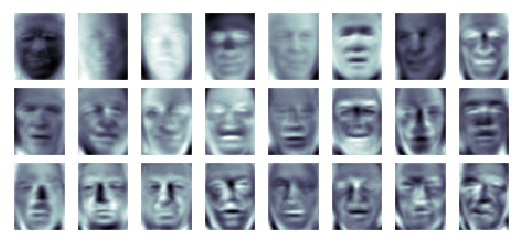

In [60]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Text(0,0.5,'cumulative explained variance')

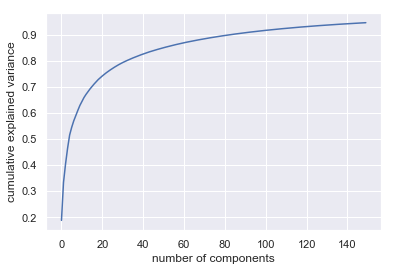

In [64]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [65]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18776746, 0.33325663, 0.40429187, 0.46455932, 0.5149668 ,
       0.54433274, 0.56903905, 0.5895143 , 0.6091988 , 0.6281166 ,
       0.64372647, 0.658431  , 0.67057174, 0.6815275 , 0.6919557 ,
       0.7016762 , 0.71074396, 0.7195092 , 0.72764003, 0.7346909 ,
       0.7415143 , 0.74799544, 0.7540309 , 0.7598166 , 0.76514024,
       0.7703467 , 0.77534825, 0.78011197, 0.7846364 , 0.78888947,
       0.79294115, 0.7967426 , 0.800343  , 0.80385286, 0.8073297 ,
       0.81057864, 0.8137227 , 0.8168289 , 0.81990534, 0.822807  ,
       0.82563454, 0.82838327, 0.8311111 , 0.8337109 , 0.8361748 ,
       0.83855695, 0.84090656, 0.8432223 , 0.8454947 , 0.84771377,
       0.8498202 , 0.8518792 , 0.853909  , 0.8559166 , 0.8578757 ,
       0.85983   , 0.86171174, 0.8635408 , 0.86530834, 0.86706775,
       0.8688169 , 0.87048143, 0.87209487, 0.87368125, 0.8752475 ,
       0.87677675, 0.87827605, 0.8797372 , 0.8811896 , 0.8826008 ,
       0.8840061 , 0.8853705 , 0.8867327 , 0.8880494 , 0.88934

In [67]:
# 计算成分和投影的人脸
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

Text(0,0.5,'150-dim\nreconstruction')

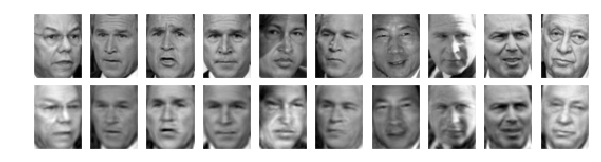

In [70]:
# 画出结果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\nput', color='w')
ax[1, 0].set_ylabel('150-dim\nreconstruction', color='w')